In [1]:
cd ..

/home/timgarrels/Projects/masterthesis/experiment/motif_position_tooling


In [2]:
from pathlib import Path

data_dir = Path("experiment_data") / "scale_free_bfeeb118-a877-11ed-9901-fff9dab51560"

In [3]:
from motif_position_tooling.utils.motif_io import MotifGraph, MotifGraphWithRandomization

In [4]:
from os import listdir

motif_graphs = [
    MotifGraphWithRandomization(data_dir / i, "scale_free_graph.edgelist")
    for i in listdir(data_dir)
]

# Analysis of one Graph and One Motif Size

In [5]:
import networkx as nx

In [6]:
motif_graph = motif_graphs[0]
k = 3

In [7]:
g = nx.read_edgelist(motif_graph.get_graph_path())

In [8]:
motif_graph.get_motif_metric_json(4)

PosixPath('experiment_data/scale_free_bfeeb118-a877-11ed-9901-fff9dab51560/43/scale_free_graph.edgelist_motifs/4/motif_metric_data.json')

In [9]:
len(g.nodes)

100

In [10]:
import json

with open(motif_graph.get_motif_metric_json(k), "r") as f:
    data = json.load(f)

In [11]:
from motif_position_tooling.utils.motif_io import load_motif_zip

motifs = load_motif_zip(motif_graph.get_motif_pos_zip(k))

/home/timgarrels/Projects/masterthesis/experiment/motif_position_tooling/.venv/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


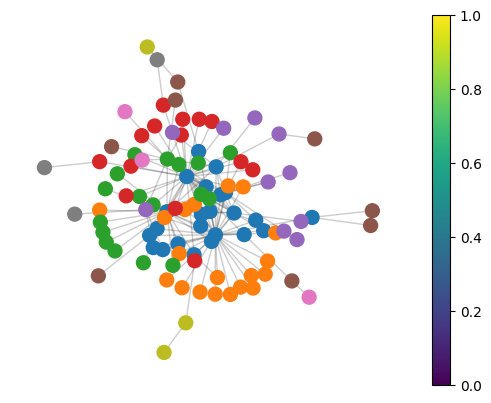

In [12]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

color_table = list(mcolors.TABLEAU_COLORS)

colors = []
for i, partition in enumerate(data["modularity_partitions"]):
    for n in partition:
        colors.append(color_table[i])
    


pos = nx.spring_layout(g, k=2 / (len(g.nodes) ** (0.4)))

ec = nx.draw_networkx_edges(g, pos, alpha=0.2)

nc = nx.draw_networkx_nodes(
    g,
    pos,
    nodelist=g.nodes,
    node_color=colors,
    node_size=100,
    cmap=plt.cm.jet,
)


plt.colorbar(nc)
plt.axis('off')
plt.show()



Text(0.5, 1.0, 'Motif Degree Histogram')

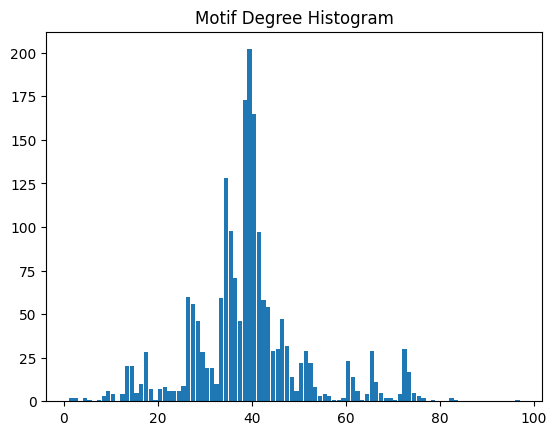

In [13]:
import matplotlib.pyplot as plt

motif_degrees = []
for _, data_dict in data["motif_data"].values():
    motif_degrees.append(data_dict["motif_degree"])

fig, ax = plt.subplots(1,1)
ax.hist(motif_degrees, rwidth=0.9, bins=range(min(motif_degrees), max(motif_degrees) + 1))
ax.set_title("Motif Degree Histogram")

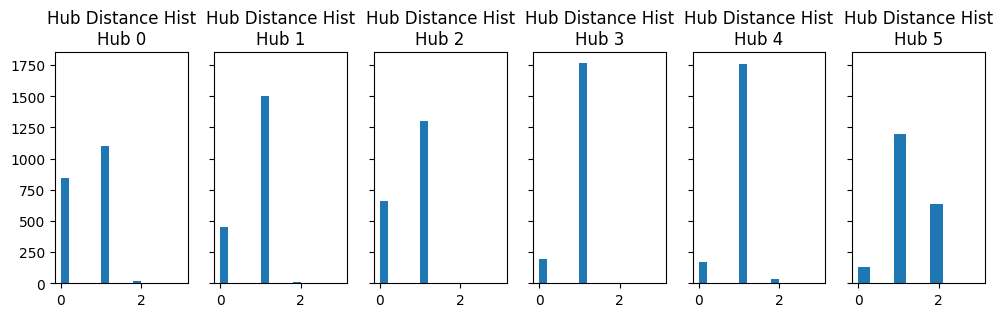

In [14]:
hub_distance = []
for _, data_dict in data["motif_data"].values():
    hub_distance.append(data_dict["hub_distances"])

fig, axes = plt.subplots(1, len(data["hubs"]), figsize=(12,3), sharex=True, sharey=True)

for i, ax in enumerate(axes):
    d = list(map(lambda x: x[i], hub_distance))
    ax.hist(d)
    ax.set_title(f"Hub Distance Hist\nHub {i}")

In [15]:
motif_index_to_hub_distance_sum = list(map(lambda x: (x[0], sum(x[1])), enumerate(hub_distance)))

In [16]:
min_distance_to_all_hubs = min(map(lambda x: x[1], motif_index_to_hub_distance_sum))

In [17]:
max_distance_to_all_hubs = max(map(lambda x: x[1], motif_index_to_hub_distance_sum))

In [18]:
# Motifs with min distance to all hubs (most central motifs)
central_motifs = [i for i, d in motif_index_to_hub_distance_sum if d == min_distance_to_all_hubs]
print(central_motifs)
print([motif_degrees[i] for i in central_motifs])


[773, 775, 776, 793, 797, 798, 819, 827, 839, 1119, 1121, 1123, 1199, 1201, 1214, 1638, 1640, 1780, 1877]
[61, 82, 75, 61, 83, 76, 82, 97, 75, 48, 47, 68, 49, 70, 71, 55, 54, 56, 34]


In [19]:
# Motifs with max distance to all hubs (most un-central motifs)
uncentral_motifs = [i for i, d in motif_index_to_hub_distance_sum if d == max_distance_to_all_hubs]
print(uncentral_motifs)
print([motif_degrees[i] for i in uncentral_motifs])


[1944]
[1]


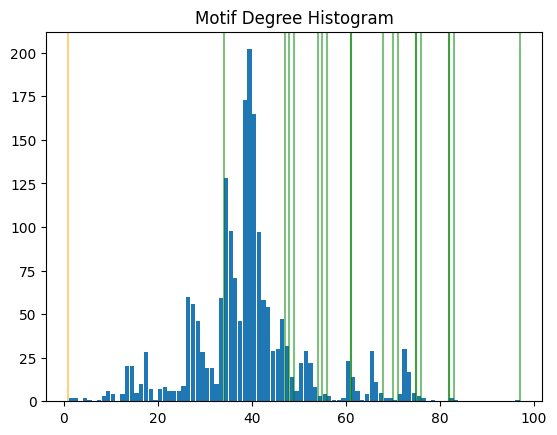

In [20]:
import matplotlib.pyplot as plt

motif_degrees = []
for _, data_dict in data["motif_data"].values():
    motif_degrees.append(data_dict["motif_degree"])

fig, ax = plt.subplots(1,1)
ax.hist(motif_degrees, rwidth=0.9, bins=range(min(motif_degrees), max(motif_degrees) + 1))
ax.set_title("Motif Degree Histogram")

for i in uncentral_motifs:
    ax.axvline(motif_degrees[i], color="orange", alpha=0.5)
for i in central_motifs:
    ax.axvline(motif_degrees[i], color="green", alpha=0.5)

Text(0.5, 1.0, 'Motif Participation in Partitions Histogram')

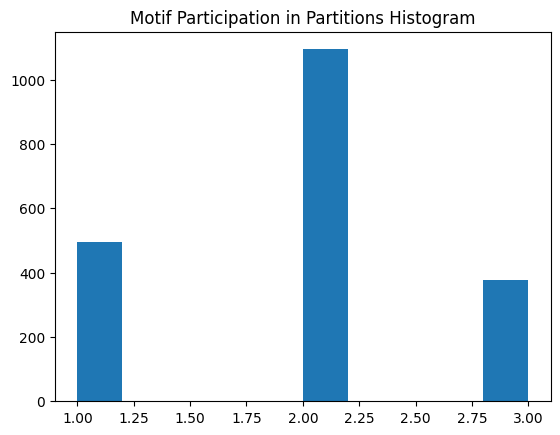

In [21]:
# Motif Partition Participation

motif_partition = []
for _, data_dict in data["motif_data"].values():
    motif_partition.append(data_dict["partition_participation"])

count_participations = list(map(len, motif_partition))
fig, ax = plt.subplots(1,1)
ax.hist(count_participations, rwidth=1,)
ax.set_title("Motif Participation in Partitions Histogram")

Next steps:
- Filter motifs by frequency (identifying statistical relevant motifs)
- Extract the metrics of those relevant motifs
- Figure out aggregated visualizations of multiple motif graphs
- ?